In [8]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bda.utils import summarize_beta_binomial, plot_beta_prior, plot_binomial_likelihood, plot_beta_binomial

# 3.1 The Beta prior model

In this example we want to model election results.
In numbers this means we want to model a percentage.

So the prior model should model our belief. In other words the prior should model the probabability of a fraction or percentage. 

In that case the Beta model suits the requirements:
- restricted to the interval [0, 1]
- area under the curve is 1

The model Beta(45, 55) suits the data in the past best:

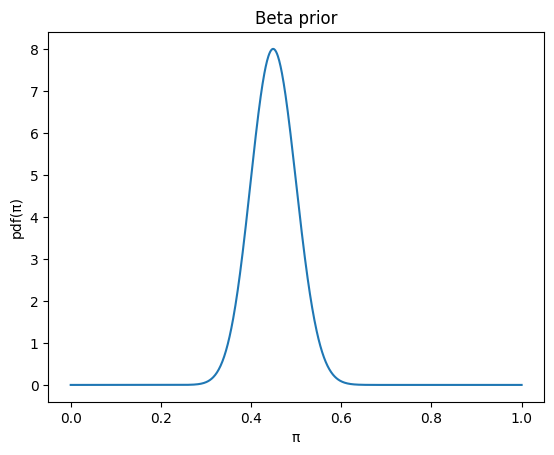

In [9]:
pi = np.linspace(0, 1, 1000)
prior = stats.beta.pdf(a=45, b=55, x=pi)

plt.plot(pi, prior)
plt.xlabel("π")
plt.ylabel("pdf(π)")
plt.title("Beta prior")
plt.show()

# 3.2 The Binomial data model & likelihood function

I plan to take a new poll with 50 participants. This survey should give some insights into the current support of a election candidate.

The outcome shows that 30 of the 50 participants support the candidate.

To model the likelihood the binomial model suits best, since it shows the likeliness of a certain π with 30 subects of 50 supporting the candidate.

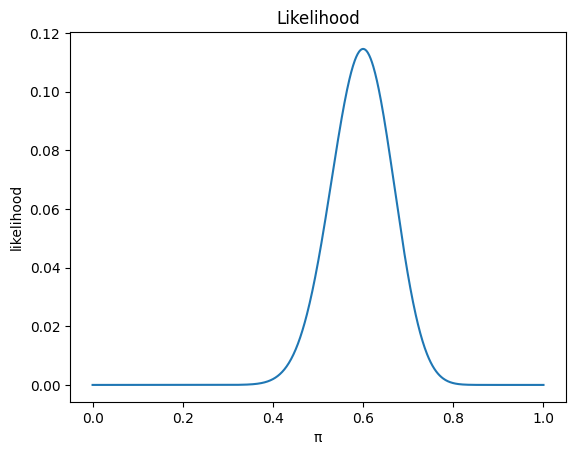

In [10]:
n = 50
k = 30

likelihood = stats.binom.pmf(n=n, k=k, p=pi)

plt.plot(pi, likelihood)
plt.xlabel("π")
plt.ylabel("likelihood")
plt.title("Likelihood")
plt.show()

Wie man sehen kann, scheint ein π am plausibelsten bei 30 von 50. Das macht auch Sinn, da:

In [11]:
30/50

0.6

Vergleicht man nun die Likelihood und die Prior:

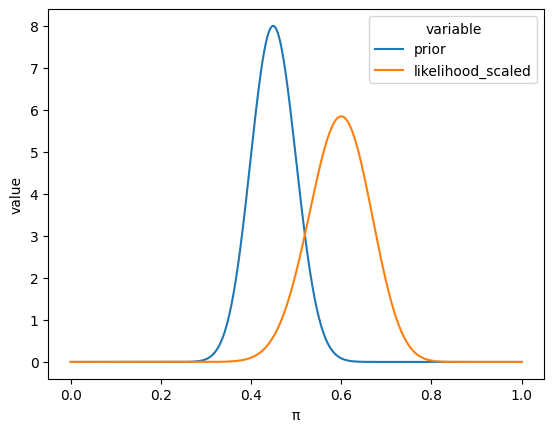

In [12]:
df = pd.DataFrame({
    "π":pi,
    "prior": prior,
    "likelihood": likelihood,
    "likelihood_scaled": likelihood / likelihood.sum() * len(pi)
})

sns.lineplot(df.drop(columns="likelihood").melt("π"), x="π", y="value", hue="variable")
plt.show()

Wie man sehen kann, schätzt die likelihood, dass die Unterstützung für den Kandidaten höher ist als wir vermuteten.

# 3.3 The Beta posterior model

Nun berechnen wir die posterior pdf:

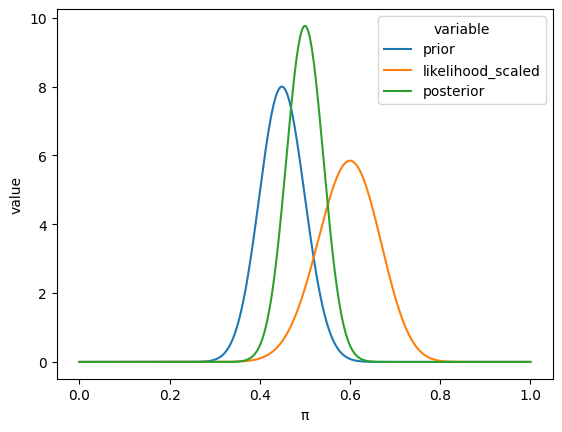

In [13]:
posterior = likelihood*prior / (likelihood*prior).sum() * len(pi)

df["posterior"] = posterior

sns.lineplot(df.drop(columns="likelihood").melt("π"), x="π", y="value", hue="variable")
plt.show()

Und nun noch mit den utils funktionen:

In [14]:
summarize_beta_binomial(alpha=45, beta=55, n=50, y=30)

,alpha,beta,mean,mode,var,sd
model,,,,,,
prior,45,55,0.45,0.44898,0.002450,0.049502
posterior,75,75,0.50,0.50000,0.001656,0.040689


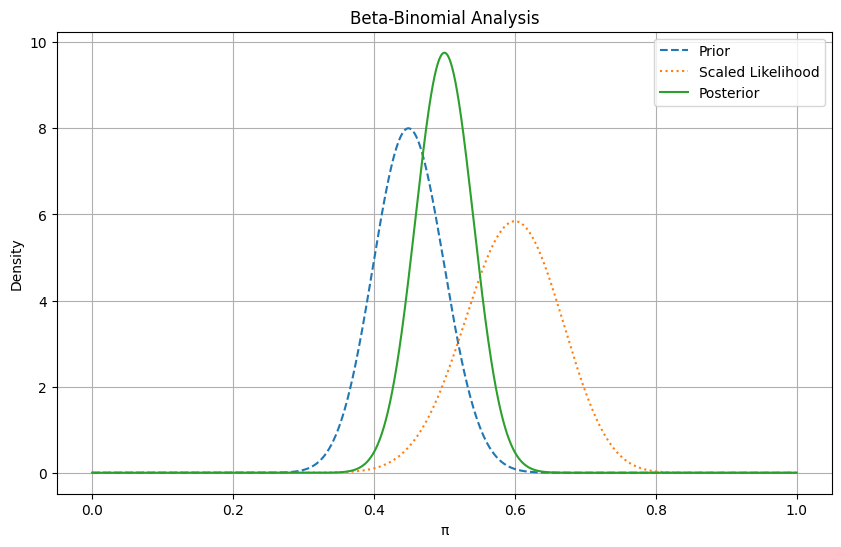

In [15]:
plot_beta_binomial(alpha=45, beta=55, n=50, y=30)

# 3.5 Simulating the Beta-Binomial

In diesem Abschnitt simuliere ich die Posterior über sampling:

In [16]:
df = pd.DataFrame({
    "π": stats.beta.rvs(a=45, b=55, size=100000)
}) 

df["k"] = stats.binom.rvs(n=50, p=df.π)
df["k==30"] = df["k"] == 30

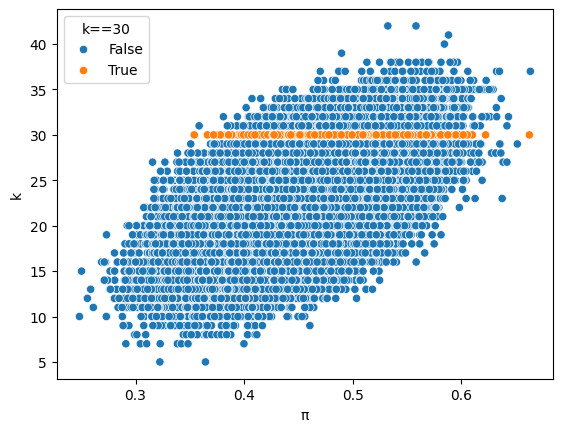

In [17]:
sns.scatterplot(df, x="π", y="k", hue="k==30")
plt.show()

Hier wurde nun das k in Abhängigkeit von π simuliert. Dadurch erhalten wir die komplette Verteilung aller k's bei 50 Befragten unter der Prior Verteilung. Somit gibt es mehr Punkte, wo die Prior oft vorkommt und dieses π unter der Binomialverteilung plausibel ist.

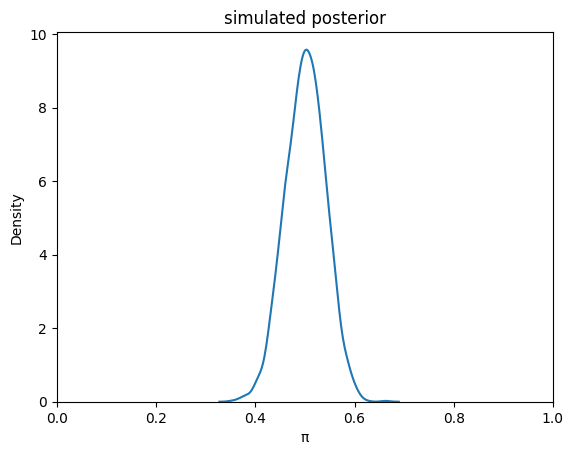

In [18]:
sns.kdeplot(df.query("k==30"), x="π")
plt.xlim(0, 1)
plt.title("simulated posterior")
plt.show()

Wie man erkennen kann, 

# 3.6 Example: Milgram’s behavioral study of obedience

Nun ein weiteres Beispiel:

Eine Person sollte einer weiteren einen elektrischen Schock verabreichen mit immer intenseren Stärke. Das maximale Level könnte der anderen Person auch schaden.
Die Schocks sind allerdings Fake. Man wollte testen, ob die Teilnehmenden gehochen würden, obwohl das bedeuten würde, dass jemand anderes sterben könnte. Es nahmen 40 Personen teil. Insgesamt gingen 26 Personen bis auf die höchste Stufe.

Dies wird mit einem Beta-Binomial modeliert. 

Als prior wird Beta(1, 10) verwendet und als Likelihood eine Bin(40, π):

$$
Y \mid \pi \sim \text{Bin}(40, \pi), \\
\pi \sim \text{Beta}(1, 10).
$$



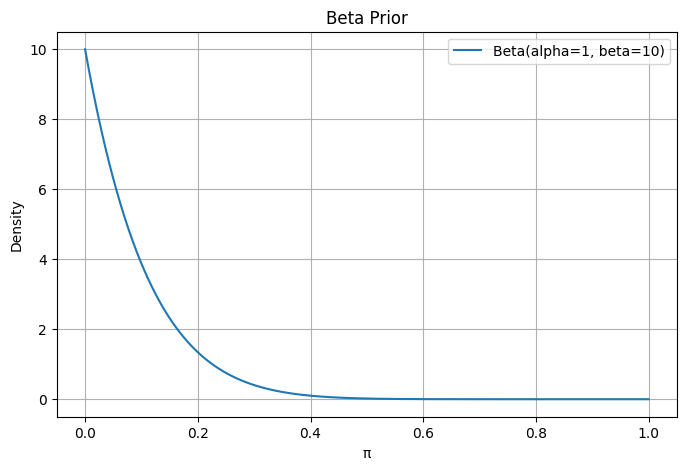

In [19]:
plot_beta_prior(1, 10)

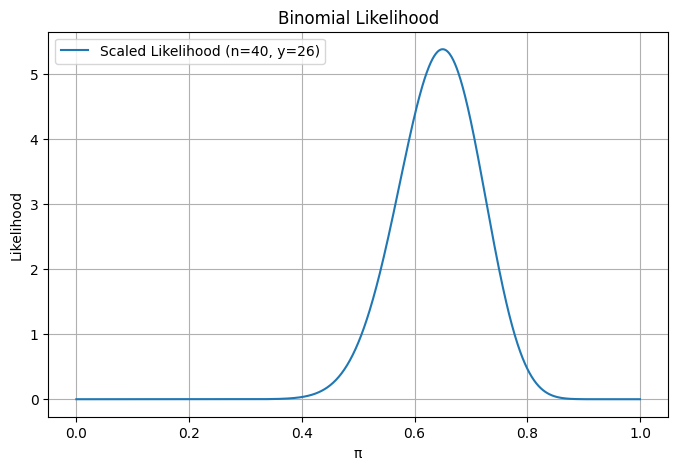

In [20]:
plot_binomial_likelihood(40, 26)

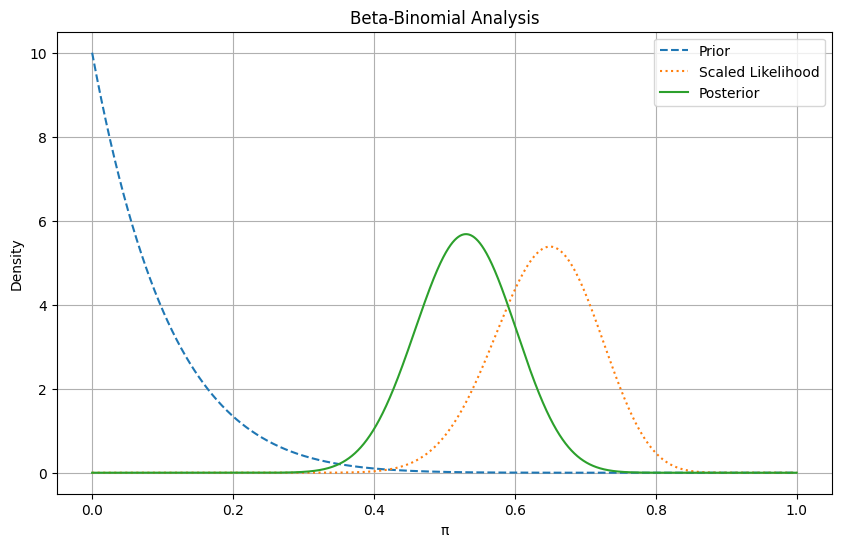

In [22]:
plot_beta_binomial(alpha=1, beta=10, n=40, y=26)

Nun nach dem Prior hatte der Psychologe, welche das Experiment durchführte erwartet, dass nur wenige der maximale Schock verabreichen würden. Allerdings war dies eine grosse Fehleinschätzung, welche durch die Daten nach oben korrigiert wurde.

Denn die Likelihood erwartet eher, dass die wahrscheinlichkeit zwischen 60 und 70% liegt.